In [1]:
import torch
import numpy as np
from glob import glob
import os
import matplotlib
import pandas as pd

PATH = '/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/FedFOLA/kld/without_reparam/single_run_1000_new/Graph-DC_FedFOLA_NE_KLD_WITHOUT_repara_singlestep_lr_0_05_local_update_steps_1_csd_imp_10_kld_imp_1/FedFOLA_GraphDC_gin_on_fs_contest_data_lr0.05_lstep1_/features'

train_test_val = 'val'

save_path = '/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/FedFOLA/CSV/kld/without_reparam/Feature_Analysis/Graph-DC_FedFOLA_NE_KLD_WITHOUT_repara_multistep_lr_0_05_local_update_steps_1_csd_imp_10_kld_imp_1' +'/'+ train_test_val + '/'
if train_test_val == 'train':
    nun_samples = 11649
elif train_test_val == 'val':
    nun_samples = 3883
elif train_test_val == 'test':
    nun_samples = 3889

In [2]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
#interm_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
mu_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
std_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],
              13:[]}


In [4]:
all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [5]:
def get_files(path):
    for client in range(1, 13+1):
        client_path = f"{PATH}/client_{client}"
        all_files = [file
                 for path, subdir, files in os.walk(client_path)
                 for file in glob(os.path.join(path, '*.pt'))]
        all_files.sort()
        for file in all_files:
            file_name = os.path.basename(file)
            file_name_without_ending = file_name[:-3]
            if file_name_without_ending.startswith('mu_' + train_test_val) and not \
                    file_name_without_ending.endswith('labels'):
                mu_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('std' + train_test_val) and not\
                    file_name_without_ending.endswith('labels'):
                std_trains[client].append(torch.load(file).cpu().detach().numpy())

        #interm_trains[client] = np.concatenate(interm_trains[client])
        mu_trains[client] = np.stack(mu_trains[client], axis=1)
        std_trains[client] = np.stack(std_trains[client], axis=1)
        mu_trains[client] = mu_trains[client].T
        std_trains[client] = std_trains[client].T



In [6]:
get_files(PATH)

In [7]:
mu_trains[13]

array([[-6.71889633e-02, -9.44761857e-02, -8.55418742e-02,
        -3.37970741e-02,  9.03376862e-02,  4.39410321e-02,
        -5.38603924e-02, -7.69540593e-02,  9.11111310e-02,
        -8.90275612e-02, -7.23522976e-02, -1.00326091e-01,
        -7.46784955e-02, -1.18531279e-01,  5.17419539e-02,
         4.85878251e-02,  8.50214213e-02,  9.46838483e-02,
        -3.94190960e-02, -9.36611295e-02, -1.41105309e-01,
        -4.14155424e-02, -4.26634587e-02,  6.46261647e-02,
        -6.25961274e-02,  6.13067970e-02,  8.97074938e-02,
        -4.32547182e-02, -7.71777630e-02, -4.06686068e-02,
         7.73195997e-02, -7.94349164e-02, -6.85496703e-02,
        -6.67225495e-02, -6.90819994e-02, -2.67897621e-02,
        -9.39600244e-02, -6.87437877e-02, -5.80182411e-02,
        -5.79770654e-02, -3.84402573e-02,  2.34691128e-02,
        -9.98102799e-02,  1.01752833e-01, -9.72182080e-02,
        -1.06306627e-01, -7.56903738e-02,  9.41713452e-02,
        -6.58803284e-02, -3.92400213e-02,  6.59006909e-0

In [8]:
import numpy as np
#concat_X=global_train
data_out_std = {}
data_out_mu = {}

for key in std_trains.keys():
    data_out_std[key] = std_trains[key]
    data_out_mu[key] = mu_trains[key]

X_concat_std = []
X_concat_mu = []

for key in std_trains.keys():
    X_concat_std.append(data_out_std[key])
    X_concat_mu.append(data_out_mu[key])

X_concat_std = np.concatenate(X_concat_std)
X_concat_mu = np.concatenate(X_concat_mu)



In [9]:
isExist = os.path.exists(save_path)
if not isExist:
    os.makedirs(save_path)

In [10]:
val_mu = []
val_std = []
mu_trains_mean = []
std_trains_mean = []

In [11]:
for client in range(1, 13+1):


    val_mu_curr = mu_trains[client].mean()
    val_std_curr = np.mean(std_trains[client])

    val_mu.append(val_mu_curr)
    val_std.append(val_std_curr)

    mu_mean = np.mean(mu_trains[client], axis = 0)
    std_mean = np.mean(std_trains[client], axis = 0)

    mu_trains_mean.append(mu_mean)
    std_trains_mean.append(std_mean)


In [12]:
data_map = {
    ('mu_mean'): val_mu,
    ('std_mean'): val_std,
}
df = pd.DataFrame(data=data_map)
df.to_csv(save_path + 'statistics.csv')

In [13]:
import matplotlib.pyplot as plt

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.rcParams["figure.figsize"] = (10, 6)
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)
plt.rc('font', size=30)

<Figure size 1000x600 with 0 Axes>

In [27]:
x = range(1,65)

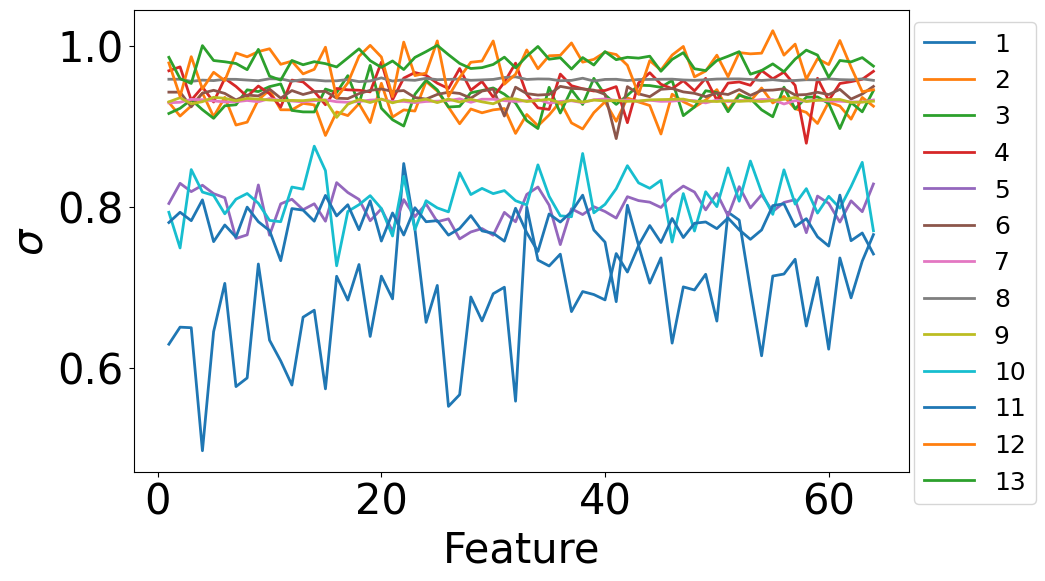

In [28]:
for client in range(1, 13+1):
    plt.plot(x, std_trains_mean[client-1], label = client, linewidth=2.0)
plt.legend(bbox_to_anchor=(1.18, 1.0))
plt.xlabel("Feature")
plt.ylabel(r'$\sigma$')
plt.savefig(save_path + 'std_clients', bbox_inches='tight')

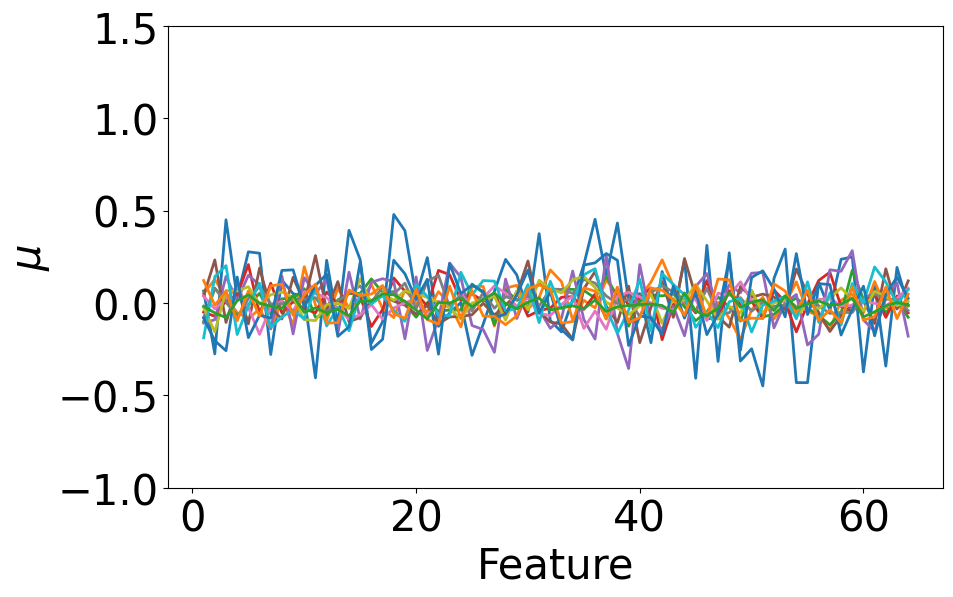

In [29]:
for client in range(1, 13+1):
    plt.plot(x, mu_trains_mean[client-1], label = client, linewidth=2.0)
#plt.legend(bbox_to_anchor=(1.12, 1.0))
plt.ylim(-1, 1.5)
plt.xlabel("Feature")
plt.ylabel(r'$\mu$')
plt.savefig(save_path + 'mu_clients', bbox_inches='tight')